# Análisis de un Sistema de Resortes con el Método de Elementos Finitos (MEF)

Este notebook demuestra cómo resolver un sistema de resortes unidimensional utilizando el Método de Elementos Finitos (MEF). El proceso consiste en:
1.  **Discretizar** el sistema en nodos y elementos (resortes).
2.  Definir la **matriz de rigidez** para cada elemento.
3.  **Ensamblar** las matrices de los elementos para formar la matriz de rigidez global del sistema.
4.  Aplicar las **condiciones de frontera** (apoyos) y las **cargas externas**.
5.  Resolver el sistema de ecuaciones `[K]{u} = {F}` para encontrar los **desplazamientos** desconocidos `{u}`.
6.  Realizar el **post-procesamiento** para calcular las fuerzas de reacción y las fuerzas internas en cada resorte.

**Problema:**

El siguiente ejemplo, basado en el libro *A First Course in the Finite Element Method* de Daryl L. Logan, analiza el sistema de resortes mostrado a continuación. Se busca determinar los desplazamientos en los nodos 3 y 4, las fuerzas de reacción en los apoyos (nodos 1 y 2) y las fuerzas internas en cada resorte.

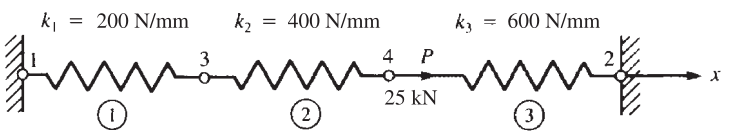

In [1]:
from mnspy import Nodo, Resorte, Ensamble

### Paso 1: Definición de los Nodos
Se crean los nodos del sistema. Los `grados_libertad` se usan para definir las condiciones de frontera:
- `{'x': False}`: El desplazamiento en la dirección 'x' está restringido (apoyo fijo).
- `{'x': True}`: El desplazamiento en 'x' es libre (un grado de libertad desconocido).

In [2]:
n_1= Nodo('1',grados_libertad={'x': False})
n_2= Nodo('2',grados_libertad={'x': False})
n_3= Nodo('3',grados_libertad={'x': True})
n_4= Nodo('4',grados_libertad={'x': True})

### Paso 2: Definición de los Elementos (Resortes)
Se crean los elementos tipo `Resorte`, especificando su ID, los nodos que conecta y su constante de rigidez `k`.

In [3]:
e_1 = Resorte('1',n_1,n_3,k=200)
e_2 = Resorte('2',n_3,n_4,k=400)
e_3 = Resorte('3',n_4,n_2,k=600)

### Paso 3: Aplicación de Cargas Externas
 
Se aplica la fuerza externa de $25000\,N$ en el nodo $4$, en la dirección 'x'.

In [4]:
n_4.agregar_fuerza_externa(25000,'x')

### Paso 4: Matrices de Rigidez de los Elementos
 
Cada elemento resorte tiene una matriz de rigidez local de 2x2 que relaciona las fuerzas y desplazamientos en sus nodos.

In [5]:
e_1

Resorte: 1

In [6]:
e_2

Resorte: 2

In [7]:
e_3

Resorte: 3

### Paso 5: Ensamble del Sistema y Diagrama
Se crea un objeto `Ensamble` que agrupa todos los elementos. El método `diagrama_cargas()` genera una representación visual del problema.

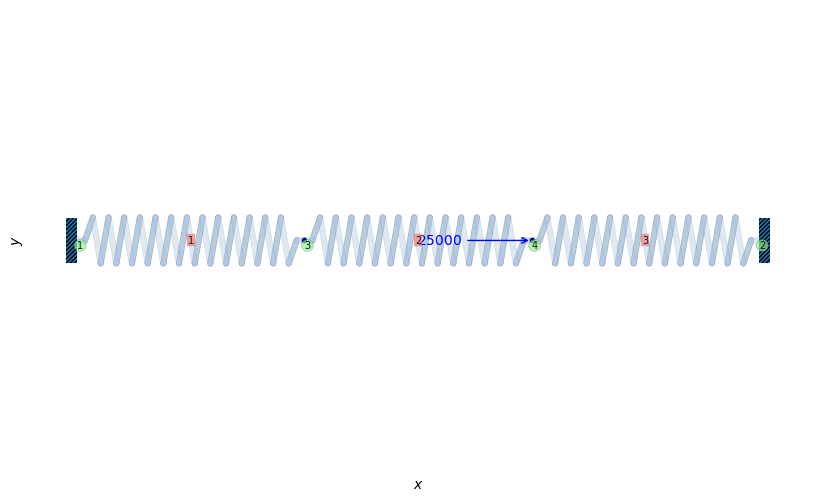

In [8]:
mg = Ensamble([e_1, e_2, e_3])
mg.diagrama_cargas()

### Paso 6: Matriz de Rigidez Global
El ensamble construye la matriz de rigidez global del sistema completo, combinando las matrices de cada elemento.

In [9]:
mg

### Paso 7: Matriz de Rigidez Global Reducida
Esta es la matriz de rigidez que corresponde únicamente a los grados de libertad desconocidos (desplazamientos en los nodos 3 y 4). Es el sistema `[K]` que se resolverá.

In [10]:
mg.matriz_global_reducida()

<IPython.core.display.Math object>

### Paso 8: Solución del Sistema
Se resuelve el sistema `[K]{u} = {F}` para encontrar los desplazamientos desconocidos. Luego, se utilizan estos desplazamientos para calcular las fuerzas de reacción en los apoyos.

In [11]:
mg.solucionar_por_gauss_y_calcular_reacciones()
# El método `solucion()` muestra los desplazamientos calculados en los nodos 3 y 4.
mg.solucion()

Desplazamientos,Reacciones
$u_{1}=0$,$\color{blue}F_{1x}=-4545.454545$
$\color{blue}u_{3}=22.72727273$,$\cancel{F_{3x}}$
$\color{blue}u_{4}=34.09090909$,$\cancel{F_{4x}}$
$u_{2}=0$,$\color{blue}F_{2x}=-20454.54545$


In [12]:
# Al mostrar el objeto `Ensamble` de nuevo, se puede ver el estado completo del sistema, incluyendo los desplazamientos y las fuerzas de reacción calculadas.
mg

### Paso 9: Post-procesamiento (Fuerzas Internas)
 
Una vez conocidos los desplazamientos nodales, se puede calcular la fuerza interna (tensión o compresión) en cada resorte.

In [13]:
e_1

Resorte: 1

In [14]:
e_2

Resorte: 2

In [15]:
e_3

Resorte: 3

In [16]:
# El método `fuerzas_internas()` calcula y muestra la fuerza en el resorte 1.
e_1.fuerzas_internas()

,Fuerzas internas
$f^{(1)}_{1x}$,-4545.45
$f^{(1)}_{3x}$,4545.45


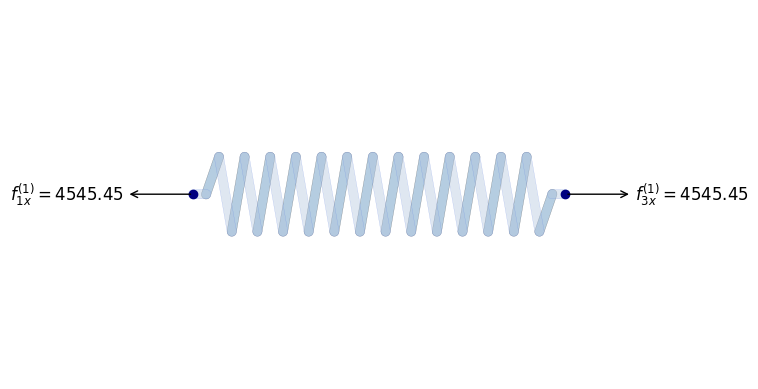

In [17]:
# El diagrama muestra estas fuerzas.
e_1.diagrama_fuerzas_internas()

In [18]:
e_2.fuerzas_internas()

,Fuerzas internas
$f^{(2)}_{3x}$,-4545.45
$f^{(2)}_{4x}$,4545.45


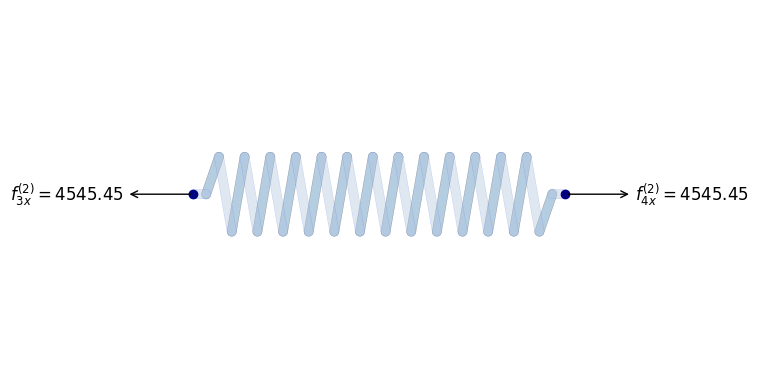

In [19]:
e_2.diagrama_fuerzas_internas()

In [20]:
e_3.fuerzas_internas()

,Fuerzas internas
$f^{(3)}_{4x}$,20454.5
$f^{(3)}_{2x}$,-20454.5


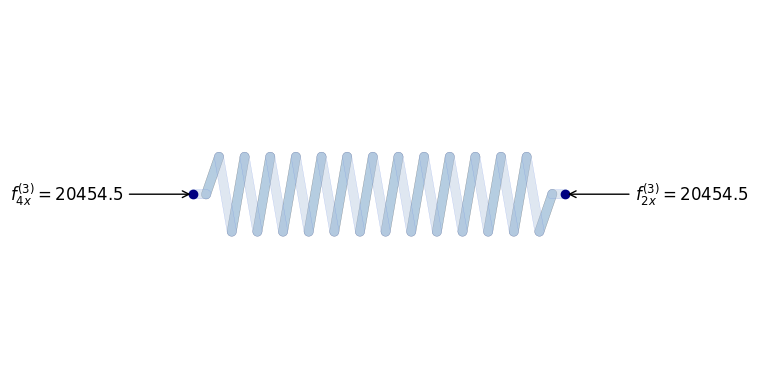

In [21]:
e_3.diagrama_fuerzas_internas()